## Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("bulidata.csv")

In [3]:
df.head()

,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,...,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,...,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,...,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0


In [4]:
df.columns

Index(['Unnamed: 0', 'MATCH_DATE', 'LEAGUE_NAME', 'SEASON', 'LEAGUE',
       'FINISHED', 'LOCATION', 'VIEWER', 'MATCHDAY', 'MATCHDAY_NR',
       'HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_TEAM', 'HOME_ICON',
       'AWAY_TEAM_ID', 'AWAY_TEAM_NAME', 'AWAY_TEAM', 'AWAY_ICON',
       'GOALS_HOME', 'GOALS_AWAY', 'DRAW', 'WIN_HOME', 'WIN_AWAY'],
      dtype='object')

In [5]:
df["HOME_TEAM"]

0             Bayern
1               Köln
2           Duisburg
3                HSV
4          Wolfsburg
            ...     
5503            Köln
5504         Leipzig
5505       Stuttgart
5506    Union Berlin
5507       Wolfsburg
Name: HOME_TEAM, Length: 5508, dtype: object

In [44]:
filtered_df = df[df['SEASON'] > 2020]
filtered_df = df[((df['SEASON'] > 2020) & (df['HOME_TEAM'] == 'Bayern')) | ((df['SEASON'] > 2020) & (df['AWAY_TEAM'] == 'Bayern'))]
print(filtered_df)

      Unnamed: 0           MATCH_DATE                      LEAGUE_NAME   
4896        4898  2021-08-13 20:30:00  1. Fußball-Bundesliga 2021/2022  \
4913        4915  2021-08-22 17:30:00  1. Fußball-Bundesliga 2021/2022   
4920        4922  2021-08-28 18:30:00  1. Fußball-Bundesliga 2021/2022   
4928        4930  2021-09-11 18:30:00  1. Fußball-Bundesliga 2021/2022   
4935        4937  2021-09-18 15:30:00  1. Fußball-Bundesliga 2021/2022   
...          ...                  ...                              ...   
5470        5472  2023-04-30 15:30:00  1. Fußball-Bundesliga 2022/2023   
5479        5481  2023-05-06 18:30:00  1. Fußball-Bundesliga 2022/2023   
5482        5484  2023-05-13 15:30:00  1. Fußball-Bundesliga 2022/2023   
5495        5497  2023-05-20 18:30:00  1. Fußball-Bundesliga 2022/2023   
5503        5505  2023-05-27 15:30:00  1. Fußball-Bundesliga 2022/2023   

      SEASON LEAGUE  FINISHED  LOCATION   VIEWER      MATCHDAY  MATCHDAY_NR   
4896    2021    bl1      True  G

In [45]:
win_stats=filtered_df[["MATCH_DATE", "HOME_TEAM", "AWAY_TEAM", "DRAW", "WIN_HOME", "WIN_AWAY"]]

In [46]:
win_stats

,MATCH_DATE,HOME_TEAM,AWAY_TEAM,DRAW,WIN_HOME,WIN_AWAY
4896,2021-08-13 20:30:00,Gladbach,Bayern,1.0,0.0,0.0
4913,2021-08-22 17:30:00,Bayern,Köln,0.0,1.0,0.0
4920,2021-08-28 18:30:00,Bayern,Hertha,0.0,1.0,0.0
4928,2021-09-11 18:30:00,Leipzig,Bayern,0.0,0.0,1.0
4935,2021-09-18 15:30:00,Bayern,Bochum,0.0,1.0,0.0
...,...,...,...,...,...,...
5470,2023-04-30 15:30:00,Bayern,Hertha,0.0,1.0,0.0
5479,2023-05-06 18:30:00,Bremen,Bayern,0.0,0.0,1.0
5482,2023-05-13 15:30:00,Bayern,Schalke,0.0,1.0,0.0
5495,2023-05-20 18:30:00,Bayern,Leipzig,0.0,0.0,1.0


In [47]:
home_bayern = win_stats[win_stats['HOME_TEAM'] == 'Bayern']
home_bayern.loc[home_bayern['DRAW'] == 1.0, 'DRAW'] = 0.5
home_bayern.loc[home_bayern['WIN_AWAY'] == 1.0, 'WIN_AWAY'] = 0.0

print(home_bayern)

               MATCH_DATE HOME_TEAM     AWAY_TEAM  DRAW  WIN_HOME  WIN_AWAY
4913  2021-08-22 17:30:00    Bayern          Köln   0.0       1.0       0.0
4920  2021-08-28 18:30:00    Bayern        Hertha   0.0       1.0       0.0
4935  2021-09-18 15:30:00    Bayern        Bochum   0.0       1.0       0.0
4957  2021-10-03 17:30:00    Bayern     Frankfurt   0.0       0.0       0.0
4970  2021-10-23 15:30:00    Bayern    Hoffenheim   0.0       1.0       0.0
4987  2021-11-06 15:30:00    Bayern      Freiburg   0.0       1.0       0.0
5010  2021-11-27 18:30:00    Bayern     Bielefeld   0.0       1.0       0.0
5023  2021-12-11 15:30:00    Bayern         Mainz   0.0       1.0       0.0
5040  2021-12-17 20:30:00    Bayern     Wolfsburg   0.0       1.0       0.0
5049  2022-01-07 20:30:00    Bayern      Gladbach   0.0       0.0       0.0
5082  2022-02-05 18:30:00    Bayern       Leipzig   0.0       1.0       0.0
5100  2022-02-20 15:30:00    Bayern         Fürth   0.0       1.0       0.0
5113  2022-0

In [48]:
away_bayern = win_stats[win_stats['AWAY_TEAM'] == 'Bayern']
away_bayern.loc[away_bayern['DRAW'] == 1.0, 'DRAW'] = 0.5
away_bayern.loc[away_bayern['WIN_HOME'] == 1.0, 'WIN_HOME'] = 0.0

print(away_bayern)

               MATCH_DATE     HOME_TEAM AWAY_TEAM  DRAW  WIN_HOME  WIN_AWAY
4896  2021-08-13 20:30:00      Gladbach    Bayern   0.5       0.0       0.0
4928  2021-09-11 18:30:00       Leipzig    Bayern   0.0       0.0       1.0
4941  2021-09-24 20:30:00         Fürth    Bayern   0.0       0.0       1.0
4966  2021-10-17 15:30:00    Leverkusen    Bayern   0.0       0.0       1.0
4982  2021-10-30 15:30:00  Union Berlin    Bayern   0.0       0.0       1.0
4995  2021-11-19 20:30:00      Augsburg    Bayern   0.0       0.0       0.0
5019  2021-12-04 18:30:00           BVB    Bayern   0.0       0.0       1.0
5031  2021-12-14 18:30:00     Stuttgart    Bayern   0.0       0.0       1.0
5059  2022-01-15 15:30:00          Köln    Bayern   0.0       0.0       1.0
5075  2022-01-23 17:30:00        Hertha    Bayern   0.0       0.0       1.0
5086  2022-02-12 15:30:00        Bochum    Bayern   0.0       0.0       0.0
5109  2022-02-26 18:30:00     Frankfurt    Bayern   0.0       0.0       1.0
5121  2022-0

In [49]:
win_stats['Outcome'] = win_stats['DRAW'] * 0.5 + win_stats['WIN_HOME'] * 1.0 + win_stats['WIN_AWAY'] * 0.0

win_stats

,MATCH_DATE,HOME_TEAM,AWAY_TEAM,DRAW,WIN_HOME,WIN_AWAY,Outcome
4896,2021-08-13 20:30:00,Gladbach,Bayern,1.0,0.0,0.0,0.5
4913,2021-08-22 17:30:00,Bayern,Köln,0.0,1.0,0.0,1.0
4920,2021-08-28 18:30:00,Bayern,Hertha,0.0,1.0,0.0,1.0
4928,2021-09-11 18:30:00,Leipzig,Bayern,0.0,0.0,1.0,0.0
4935,2021-09-18 15:30:00,Bayern,Bochum,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
5470,2023-04-30 15:30:00,Bayern,Hertha,0.0,1.0,0.0,1.0
5479,2023-05-06 18:30:00,Bremen,Bayern,0.0,0.0,1.0,0.0
5482,2023-05-13 15:30:00,Bayern,Schalke,0.0,1.0,0.0,1.0
5495,2023-05-20 18:30:00,Bayern,Leipzig,0.0,0.0,1.0,0.0


In [50]:
win_stats['Outcome'] = win_stats['DRAW'] * 0.5 + win_stats['WIN_HOME'] * 1.0 + win_stats['WIN_AWAY'] * 0.0

print(win_stats)

               MATCH_DATE HOME_TEAM AWAY_TEAM  DRAW  WIN_HOME  WIN_AWAY   
4896  2021-08-13 20:30:00  Gladbach    Bayern   1.0       0.0       0.0  \
4913  2021-08-22 17:30:00    Bayern      Köln   0.0       1.0       0.0   
4920  2021-08-28 18:30:00    Bayern    Hertha   0.0       1.0       0.0   
4928  2021-09-11 18:30:00   Leipzig    Bayern   0.0       0.0       1.0   
4935  2021-09-18 15:30:00    Bayern    Bochum   0.0       1.0       0.0   
...                   ...       ...       ...   ...       ...       ...   
5470  2023-04-30 15:30:00    Bayern    Hertha   0.0       1.0       0.0   
5479  2023-05-06 18:30:00    Bremen    Bayern   0.0       0.0       1.0   
5482  2023-05-13 15:30:00    Bayern   Schalke   0.0       1.0       0.0   
5495  2023-05-20 18:30:00    Bayern   Leipzig   0.0       0.0       1.0   
5503  2023-05-27 15:30:00      Köln    Bayern   0.0       0.0       1.0   

      Outcome  
4896      0.5  
4913      1.0  
4920      1.0  
4928      0.0  
4935      1.0  
...

In [51]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

#win_stats = pd.DataFrame({'MATCH_DATE': ['2023-11-10', '2023-11-11', '2023-11-12'], 'Outcome': ['Win', 'Loss', 'Win']})

#convert the MATCH_DATE column to a datetime format
win_stats["MATCH_DATE"] = pd.to_datetime(win_stats['MATCH_DATE'])

#convert the MATCH_DATE column to a string in the format YYYY-MM-DD
win_stats["MATCH_DATE_str"] = win_stats["MATCH_DATE"].dt.strftime('%Y-%m-%d')

#create a new dataframe containing only the MATCH_DATE and Outcome columns
new_win_stats = win_stats[['MATCH_DATE_str', 'Outcome']]

#print the new dataframe
print(new_win_stats)


     MATCH_DATE_str  Outcome
4896     2021-08-13      0.5
4913     2021-08-22      1.0
4920     2021-08-28      1.0
4928     2021-09-11      0.0
4935     2021-09-18      1.0
...             ...      ...
5470     2023-04-30      1.0
5479     2023-05-06      0.0
5482     2023-05-13      1.0
5495     2023-05-20      0.0
5503     2023-05-27      0.0

[68 rows x 2 columns]


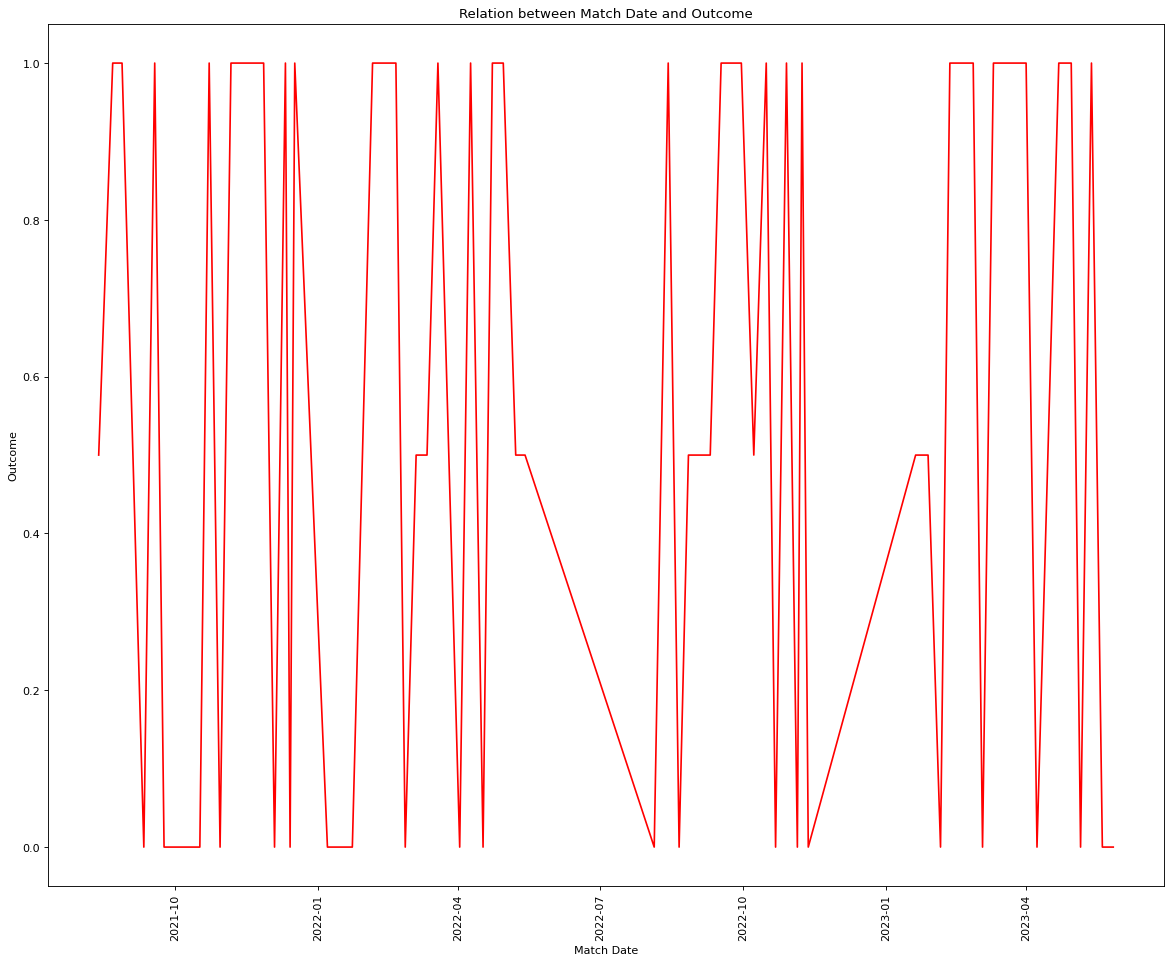

In [61]:
from matplotlib.pyplot import figure

#convert the MATCH_DATE_str column to datetime objects
new_win_stats["MATCH_DATE"] = pd.to_datetime(new_win_stats["MATCH_DATE_str"])

#sort the DataFrame by the MATCH_DATE column
new_win_stats = new_win_stats.sort_values(by="MATCH_DATE_str")

#extract the MATCH_DATE and Outcome columns
match_dates = new_win_stats["MATCH_DATE_str"]
outcomes = new_win_stats["Outcome"]

figure(figsize=(18, 14), dpi=80)

#create a line plot
plt.plot(match_dates, outcomes, color='red')

#rotate the x values
plt.xticks(rotation=90)

#set the title and axis labels
plt.title("Relation between Match Date and Outcome")
plt.xlabel("Match Date")
plt.ylabel("Outcome")

#show the plot
plt.show()

## How accurate are my predictions?

In [53]:
import pandas as pd
import datetime

#convert the date column to a single number
new_win_stats['MATCH_DATE_str'] = new_win_stats['MATCH_DATE_str'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
new_win_stats['date_to_number'] = new_win_stats['MATCH_DATE_str'].apply(lambda x: x.year * 10000 + x.month * 100 + x.day)

print(new_win_stats)

     MATCH_DATE_str  Outcome MATCH_DATE  date_to_number
4896     2021-08-13      0.5 2021-08-13        20210813
4913     2021-08-22      1.0 2021-08-22        20210822
4920     2021-08-28      1.0 2021-08-28        20210828
4928     2021-09-11      0.0 2021-09-11        20210911
4935     2021-09-18      1.0 2021-09-18        20210918
...             ...      ...        ...             ...
5470     2023-04-30      1.0 2023-04-30        20230430
5479     2023-05-06      0.0 2023-05-06        20230506
5482     2023-05-13      1.0 2023-05-13        20230513
5495     2023-05-20      0.0 2023-05-20        20230520
5503     2023-05-27      0.0 2023-05-27        20230527

[68 rows x 4 columns]


In [54]:
X = new_win_stats["date_to_number"]
y = new_win_stats["Outcome"]

X = X.to_numpy()
X = X.reshape(-1,1)

In [55]:
from sklearn.model_selection import train_test_split

#20% of the data ist the test set (test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
#show predictions
print(y_pred)

#predicting the values of our test data as y_pred
newer_win_stats = pd.DataFrame({"Real Values": y_test, "Predicted Values": y_pred})
newer_win_stats

[0.55764014 0.54577463 0.55752151 0.5586606  0.55790673 0.57053631
 0.5459226  0.57040365 0.55764906 0.54566621 0.55789908 0.57041386
 0.54565728 0.57039472 0.55841187 0.55740798 0.54603995]


,Real Values,Predicted Values
5113,0.5,0.557640
4957,0.0,0.545775
5086,1.0,0.557522
5313,0.0,0.558661
5201,0.5,0.557907
5446,0.5,0.570536
4995,1.0,0.545923
5410,1.0,0.570404
5121,0.5,0.557649
4935,1.0,0.545666
